# Data Wrangling and Analysis

## Table of Contents
1. [Introduction ](#1.Introduction)\
    1.0 [Importing Libraries](#1.0-Importing-Libraries)\
    1.1 [Gathering Data](#1.1-Gathering-Data)\
    1.2 [Using Request Library to Gather Data](#1.2-Using-Request-Library-to-Gather-Data)\
    1.3 [Gathering Data With Twitter API](#1.3-Gathering-Data-With-Twitter-API)
2. [Assessing Data](#2.-Assessing-Data)\
    2.1 [Reviewing Data Quality and Tidiness](#2.1-Reviewing-Data-Quality-and-Tidiness)\
    2.2 [Data Quality Issues Identified While Assessing Data](#2.2-Data-quality-issues-identified-while-assessing-data)\
    2.3 [Data Tidiness Issues Identified While Assessing Data](#2.3-Data-tidiness-issues-identified-while-assessing-the-data)
3. [Cleaning The Data](#3.-Cleaning-The-Data)\
    3.1 [Further Cleaning](#3.1-Further-Cleaning)\
    3.2 [Correcting the image prediction column names](#3.2-Correcting-the-image-prediction-column-names)\
    3.3 [Fixing Tidiness Issues](#3.3-Fixing-Tidiness-Issues)
4. [Storing The Data](#4.-Storing-The-Data)
5. [Analysing and Visualing The Data](#5.-Analysing-and-Visualising-the-Data)

## 1. Introduction
> The tweet archive of the Twitter user @dog rates, commonly known as WeRateDogs, is the subject of this dataset. This account rate people’s dogs and comments accordingly. To start the data wrangling and analysis process, the required datasets will be gathered using the request library and also via the Twitter API, then assessed visually and programmatically. The datasets will then be cleaned to remove unclean and untidy data. To produce the necessary results, an exploratory data analysis (EDA) will be conducted using matplotlib and seaborn.

### 1.0 Importing Libraries

In [2]:
import pandas as pd
import requests
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from PIL import Image
import cv2
import tweepy
import requests
import os
import re

### 1.1 Gathering Data

In [3]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#checking the csv file was read successfully
df_twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [5]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 1.2 Using Request Library to Gather Data

In [6]:
#creating folder directory
foldername = 'image-predictions'
if not os.path.exists('image-predictions'):
    os.makedirs('image-predictions')

In [7]:
#creating the request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [8]:
#downloading the image-predictions file programmatically
with open(os.path.join(foldername, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [9]:
#reading the image-prediction file
image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
#reviewing the file
list(image_df)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### 1.3 Gathering Data With Twitter API

In [11]:
#Querying twitter API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [12]:
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)
#Getting the JSON data via Twitter API
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
end = timer()
print(end - start)
print(fails_dict)

0.00038259999996625993
{}


In [13]:
#reading the Json file
data = []
with open('tweet-json.txt', 'r', encoding='utf=8') as file:
    for line in file:
        twitter_data = json.loads(line)
        data.append(twitter_data)
json_df = pd.DataFrame(data)


In [14]:
list(json_df)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [15]:
#Extracting tweet ID, retweet count and favorite count columns from the list
json_df = json_df [['id', 'retweet_count', 'favorite_count']]

In [16]:
json_df.sample(3)

,id,retweet_count,favorite_count
2156,669573570759163904,156,467
283,838921590096166913,2357,12183
1339,704847917308362754,1727,5594


In [17]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## 2. Assessing Data

> Assessing the data invovles checking for data quality and tidiness manually and programatically. This includes correcting inaacurate data, removing irrelevant data etc.
### Data Tidiness
> Data Tidiness tries to resolve issues with the data structure that prevents easy analysis. A Tidy data should meet the requirements:
* Each variable is a column
* Each observation is a row
* Each type of observation unit is a table

>The twitter data will be cleaned to make sure it meets the tidy data requirment and it is no longer dirty or messy 

### Data Quality
> Data quality dimensions can be used to guide thought when evaluating and cleaning. The four primary dimensions of data quality are:
* **Completeness**: This confirms if we have all the records we should have, if there are any missing rows or not. it also checks if there are specific rows, columns or cell with missing values.
* **Validity**: This seeks to confirm that the record is valid and conforms to a defined schema
* **Accuracy**: This checks that the data does not have a wrong data that is valid even though it adhere to the defined schema
* **Consistency**: As the name implies, it confirms that there is consistency in the data accuracy and validity. i.e. data is conforms to the defined schema and is also correct.


### 2.1 Reviewing Data Quality and Tidiness

In [18]:
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1253,710833117892898816,NaN,NaN,2016-03-18 14:19:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sora. She's an Egyptian Pumpernic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710833117...,12,10,Sora,None,None,None,None
1230,713411074226274305,NaN,NaN,2016-03-25 17:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see an extremely rare Bearded Floofmal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713411074...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
1606,685667379192414208,NaN,NaN,2016-01-09 03:40:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marty. He has no idea what happened he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685667379...,9,10,Marty,None,None,pupper,None
434,820494788566847489,NaN,NaN,2017-01-15 04:56:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We are proud to support @LoveYo...,8.203146e+17,4.196984e+09,2017-01-14 17:00:24 +0000,"https://www.loveyourmelon.com/pages/ourstory,h...",14,10,None,None,None,None,None


In [19]:
#Assessing the df_twitter data
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
# checking for duplicate values
sum(df_twitter.duplicated())

0

In [21]:
# checking for null values in 
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
sorted(df_twitter.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [23]:
sum(df_twitter.name == 'None')

745

In [24]:
df_twitter.query('name == "incredibly"')[['tweet_id', 'text', 'name']]

,tweet_id,text,name
542,806219024703037440,We only rate dogs. Please stop sending in non-...,incredibly


In [25]:
## 55 rows with name has a
sum(df_twitter.name == 'a')

55

In [26]:
df_twitter['rating_denominator'].sort_values(), df_twitter['rating_numerator'].sort_values()

(313       0
 2335      2
 516       7
 1576     10
 1575     10
        ... 
 1635    110
 1779    120
 1634    130
 902     150
 1120    170
 Name: rating_denominator, Length: 2356, dtype: int64,
 315        0
 1016       0
 2335       1
 2261       1
 2338       1
         ... 
 2074     420
 188      420
 189      666
 313      960
 979     1776
 Name: rating_numerator, Length: 2356, dtype: int64)

In [27]:
#Comparing dataframe shapes
df_twitter.shape

(2356, 17)

In [28]:
image_df.shape

(2075, 12)

In [29]:
json_df.shape

(2354, 3)

In [30]:
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2005,877556246731214848,https://pbs.twimg.com/media/DC20wEcW0AAf59m.jpg,1,basset,0.995368,True,Welsh_springer_spaniel,0.001936,True,bathtub,0.000468,False
322,671866342182637568,https://pbs.twimg.com/media/CVLy3zFWoAA93qJ.jpg,1,Labrador_retriever,0.875614,True,Chihuahua,0.032182,True,golden_retriever,0.017232,True
751,688064179421470721,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,1,Eskimo_dog,0.240602,True,Norwegian_elkhound,0.180369,True,Siberian_husky,0.090739,True
1429,772877495989305348,https://pbs.twimg.com/ext_tw_video_thumb/77287...,1,tabby,0.218303,False,Norwegian_elkhound,0.138523,True,wombat,0.074217,False
1208,742385895052087300,https://pbs.twimg.com/media/Ck18CFcXIAAUWoy.jpg,1,Cardigan,0.566911,True,Border_collie,0.117566,True,Appenzeller,0.047664,True


In [31]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [33]:
sum(image_df.duplicated())

0

In [34]:
json_df.sample(5)

,id,retweet_count,favorite_count
504,812781120811126785,2191,8380
1781,677673981332312066,1677,3603
536,806629075125202948,37911,75639
171,858843525470990336,3771,16304
132,866720684873056260,5168,20888


In [35]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [36]:
json_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [37]:
sum(json_df.duplicated())

0

### 2.2 Data quality issues identified while assessing data
* timestamp and  in df_twitter has wrong data type and should be datetime
* 181 retweets, indicating duplicated rows
* missing values in the name column appearing as 'None'.
* Invalid names like a, an, by, getting, his, incredibly, infuriating, officially, quite, space, such , the , this, uacceptable and very
* names wrongly spelt like billl,carll, Jennifur, klevin, paull, samsom, shawwn, traviss zooey 
* 55 users with invalid name 'a'
* inconsitency in rating_numerator and rating denominator
* the three dataframes do not have thesame shape
* Image predition data does not have decriptive columns names

### 2.3 Data tidiness Issues identified while assessing the data
* doggo, floofer, pupper and puppo should be categorical data
* the archived data and twitter api data should be merged

## 3. Cleaning The Data

> A copy of each dataset will be created to avoid tampering the original data. furthermore, the data cleaning process will involve three stages namely:
1. **Define**: establishes how the data will be cleaned
2. **Code**: Converts the defined steps to code
3. **Test**: Tests the result of the code to confirm if it was properly implemented

In [95]:
#creating copy of each dataset
df_twitter_clean= df_twitter.copy()
image_df_clean = image_df.copy()
json_df_clean = json_df.copy()

**Define**
> Keeping only the original ratings 

**Code**

### identifying rows with retweets  

In [96]:
print("number of rows with retweets:  {}".format(sum(df_twitter_clean.retweeted_status_id.notnull())))

number of rows with retweets:  181


> Removing retweets rows

In [97]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [98]:
#keeping only the original tweets and removing all rows with retweet
df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_id.isna()]

**Test**

In [99]:
#Checking to see if retweets have been removed
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

> The 181 retweets rows have been deleted, hence the empty columns will be deleted

In [100]:
# Dropping columns that are not needed
irrelevant_cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls']
df_twitter_clean = df_twitter_clean.drop(irrelevant_cols, axis = 1)

**Define**
* change the timestamp and retweeted_status_timestamp to datetime() data type

**Code**

In [101]:
df_twitter_clean.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1820,676588346097852417,2015-12-15 02:23:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He kinda resembles a fish. Al...,5,10,Bubbles,None,None,None,None


In [102]:
#code converting to datetime
df_twitter_clean.timestamp = pd.to_datetime(df_twitter_clean.timestamp)

**Test**

In [103]:
#checking to confirm data type has been changed
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


**Define**
* fixing the incorrect names using regular expression if available

**Code**


In [104]:
# Samples of names that are "a, an, the, very"
df_twitter_clean.query('(name == "a") | (name == "an") | (name == "by") | (name == "getting")|(name == "his")|(name == "incredibly")|(name == "infuriating")|(name == "officially")|(name == "quite")|(name == "space")|(name == "the")|(name == "this")|(name == "unacceptable")|(name == "very")')[['text', 'name']].sample(25)

,text,name
2347,My oh my. This is a rare blond Canadian terrie...,a
2066,This is a Helvetica Listerine named Rufus. Thi...,a
1747,This is officially the greatest yawn of all ti...,officially
1031,We only rate dogs. Pls stop sending in non-can...,very
2037,This is the best thing I've ever seen so sprea...,the
2191,This is a Slovakian Helter Skelter Feta named ...,a
2235,This is a Trans Siberian Kellogg named Alfonso...,a
992,That is Quizno. This is his beach. He does not...,his
1025,This is an Iraqi Speed Kangaroo. It is not a d...,an
1259,We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...,infuriating


In [105]:
# Using regular exepressions (Regex) to extract the correct name from the text column
# Using a function to loop through and replace the incorrect names with the right name and replace with None if no name was found
def rightname(row):
    
    if row['name'] == "a" or row['name'] == "an" or row['name'] == "by" or row['name'] == "getting" or row['name'] == "his"or row['name'] == "incredibly"or row['name'] == "infuriating"or row['name'] == "officially"or row['name'] == "quite"or row['name'] == "space"or row['name'] == "the"or row['name'] == "this"or row['name'] == "unacceptable"or row['name'] == "very":
        pattern = re.compile(r'(?:name(?:d)?\s)(?:is\s)?(\w+)')

        try:
            right_name = re.findall(pattern, row['text'])[0]
            
            row['name'] = row['name'].replace('a', right_name)
            row['name'] = row['name'].replace('an', right_name)
            row['name'] = row['name'].replace('by', right_name)
            row['name'] = row['name'].replace('getting', right_name)
            row['name'] = row['name'].replace('his', right_name)
            row['name'] = row['name'].replace('incredibly', right_name)
            row['name'] = row['name'].replace('infuriating', right_name)
            row['name'] = row['name'].replace('officially', right_name)
            row['name'] = row['name'].replace('quite', right_name)
            row['name'] = row['name'].replace('space', right_name)
            row['name'] = row['name'].replace('the', right_name)
            row['name'] = row['name'].replace('this', right_name)
            row['name'] = row['name'].replace('unacceptable', right_name)
            row['name'] = row['name'].replace('very', right_name)

        except Exception as e:
            right_name = "None"

            row['name'] = row['name'].replace('a', right_name)
            row['name'] = row['name'].replace('an', right_name)
            row['name'] = row['name'].replace('by', right_name)
            row['name'] = row['name'].replace('getting', right_name)
            row['name'] = row['name'].replace('his', right_name)
            row['name'] = row['name'].replace('incredibly', right_name)
            row['name'] = row['name'].replace('infuriating', right_name)
            row['name'] = row['name'].replace('officially', right_name)
            row['name'] = row['name'].replace('quite', right_name)
            row['name'] = row['name'].replace('space', right_name)
            row['name'] = row['name'].replace('the', right_name)
            row['name'] = row['name'].replace('this', right_name)
            row['name'] = row['name'].replace('unacceptable', right_name)
            row['name'] = row['name'].replace('very', right_name)

        return row
    
    else:
        return row


In [106]:
#putting the function into use
df_twitter_clean = df_twitter_clean.apply(rightname, axis = 1)

**Test**

In [107]:
df_twitter_clean.query('(name == "a") | (name == "an") | (name == "by") | (name == "getting")|(name == "his")|(name == "incredibly")|(name == "infuriating")|(name == "officially")|(name == "quite")|(name == "space")|(name == "the")|(name == "this")|(name == "unacceptable")|(name == "very")')[['text', 'name']]

,text,name


In [108]:
# Checking row names
df_twitter_clean.loc[[2037, 2036, 2035, 2034, 2033, 2032, 2031], ['text', 'name']]

,text,name
2037,This is the best thing I've ever seen so sprea...,None
2036,I'm just going to leave this one here as well....,None
2035,This is Oscar. He's ready for Christmas. 11/10...,Oscar
2034,This is a Tuscaloosa Alcatraz named Jacob (Yac...,Jacob
2033,Very fit horned dog here. Looks powerful. Not ...,None
2032,Say hello to Mark. He's a good dog. Always rea...,Mark
2031,When you try to recreate the scene from Lady &...,None


> Converting the 'None' to None value

In [109]:
df_twitter_clean['name'] = df_twitter_clean.name.replace({'None': None})

### 3.1 Further Cleaning

**Code**
> replacing all misspelt names

In [110]:
df_twitter_clean["name"] = df_twitter_clean['name'].replace('Billl', 'Bill')
df_twitter_clean["name"] = df_twitter_clean['name'].replace('Carll', 'Carl')
df_twitter_clean["name"] = df_twitter_clean['name'].replace('Jennifur', 'Jennifer')
df_twitter_clean["name"] = df_twitter_clean['name'].replace('Klevin', 'Kelvin')
df_twitter_clean["name"] = df_twitter_clean['name'].replace('Paull', 'Paul')
df_twitter_clean["name"] = df_twitter_clean['name'].replace('Samsom', 'Samson')
df_twitter_clean["name"] = df_twitter_clean['name'].replace('Shawwn', 'Shawn')
df_twitter_clean["name"] = df_twitter_clean['name'].replace('Traviss', 'Travis')
df_twitter_clean["name"] = df_twitter_clean['name'].replace('Zooey', 'Zoey')

**Test**

In [111]:
#checking for the misspelt names
df_twitter_clean["name"].str.contains ('Billl' or'Carll' or 'Jennifur' or 'Klevin' or 'Paull' or 'Shawwn' or 'Samsom' or 'Traviss' or 'Zooey').value_counts()

False    1440
Name: name, dtype: int64

In [112]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                1440 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 268.4+ KB


**Code**

In [113]:
#Removing outliers in numerator and denominator columns
df_twitter_clean.drop(df_twitter_clean.loc[df_twitter_clean['rating_numerator'] < 10].index, inplace=True)
df_twitter_clean.drop(df_twitter_clean.loc[df_twitter_clean['rating_numerator'] > 15].index, inplace=True)
df_twitter_clean.drop(df_twitter_clean[df_twitter_clean['rating_denominator'] != 10].index, inplace = True)


**Test**

In [114]:
df_twitter_clean['rating_numerator'].value_counts()

12    500
10    442
11    425
13    307
14     43
15      1
Name: rating_numerator, dtype: int64

In [115]:
df_twitter_clean['rating_denominator'].value_counts()

10    1718
Name: rating_denominator, dtype: int64

### 3.2 Correcting the image prediction column names

In [116]:
#old names
list(image_df_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [117]:
# setting new names
# New descriptive columns' names
columns = ['tweet_id', 'jpg_url', 'img_num',
           'prediction1', '1st_confidence', 'its_dog_1', 
           'prediction2', '2nd_confidence', 'its_dog_2',
           'prediction3', '3rd_confidence', 'its_dog_3',]

image_df_clean.columns = columns

**Test**

In [118]:
image_df_clean.sample()

,tweet_id,jpg_url,img_num,prediction1,1st_confidence,its_dog_1,prediction2,2nd_confidence,its_dog_2,prediction3,3rd_confidence,its_dog_3
208,669970042633789440,https://pbs.twimg.com/media/CUw2MV4XIAAHLO_.jpg,1,miniature_pinscher,0.734744,True,Rottweiler,0.131066,True,Doberman,0.081509,True


### 3.3 Fixing Tidiness Issues

**Define**
> Converting doggo, floofer, pupper and puppo to categorical data by melting into one column dog_type

**Code**

In [119]:
#removing None values
df_twitter_clean.iloc[:, -4: ] = df_twitter_clean.iloc[:, -4: ].replace("None", '')

In [120]:
#combine the dog types
df_twitter_clean['dog_type'] = df_twitter_clean.doggo + df_twitter_clean.floofer + df_twitter_clean.pupper + df_twitter_clean.puppo

In [121]:
#Removing old columns
df_twitter_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

**Test**

In [122]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1718 non-null   int64              
 1   timestamp           1718 non-null   datetime64[ns, UTC]
 2   source              1718 non-null   object             
 3   text                1718 non-null   object             
 4   rating_numerator    1718 non-null   int64              
 5   rating_denominator  1718 non-null   int64              
 6   name                1164 non-null   object             
 7   dog_type            1718 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 120.8+ KB


In [123]:
df_twitter_clean.dropna(inplace= True)

In [124]:
df_twitter_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type
1222,714258258790387713,2016-03-28 01:10:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,10,10,Travis,
1496,692530551048294401,2016-01-28 02:12:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cody. He's been to like 80 countr...,10,10,Cody,
1038,744334592493166593,2016-06-19 01:02:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Blanket. She has overthrown her human....,11,10,Blanket,
1367,702598099714314240,2016-02-24 20:56:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sansa. She's gotten too big for her ch...,11,10,Sansa,pupper
2046,671520732782923777,2015-12-01 02:46:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Alejandro. He's an extremely seductive pu...,10,10,Alejandro,


**Define**
> converting column 1st_prediction, 2nd_prediction and 3rd_prediction in image prediction to categorical data


**Code**

In [125]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2075 non-null   int64  
 1   jpg_url         2075 non-null   object 
 2   img_num         2075 non-null   int64  
 3   prediction1     2075 non-null   object 
 4   1st_confidence  2075 non-null   float64
 5   its_dog_1       2075 non-null   bool   
 6   prediction2     2075 non-null   object 
 7   2nd_confidence  2075 non-null   float64
 8   its_dog_2       2075 non-null   bool   
 9   prediction3     2075 non-null   object 
 10  3rd_confidence  2075 non-null   float64
 11  its_dog_3       2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [126]:
#image_df_clean = image_df_clean.drop(['1st_prediction', '1st_confidence', 'its_dog_1', '2nd_prediction', '2nd_confidence', 'its_dog_2', '3rd_prediction', '3rd_confidence', 'its_dog_3'], axis=1)

In [127]:
# Coverting the image_predictions dataset and Using NumPy select to create dog_breed
condition1 = [(image_df_clean['its_dog_1'] != True), (image_df_clean['its_dog_2'] != True), (image_df_clean['its_dog_3'] != True)]
condition2 = [image_df_clean['prediction1'], image_df_clean['prediction2'], image_df_clean['prediction3']]
percentage_confidence = [image_df_clean['1st_confidence'], image_df_clean['2nd_confidence'], image_df_clean['3rd_confidence']]
image_df_clean['dog_breed'] = np.select(condition1, condition2)
image_df_clean['percentage_conf'] = np.select(condition1, percentage_confidence)
image_df_clean['dog_breed'] = image_df_clean['dog_breed'].astype('category')


**Test**

In [128]:
image_df_clean.sample(2)

,tweet_id,jpg_url,img_num,prediction1,1st_confidence,its_dog_1,prediction2,2nd_confidence,its_dog_2,prediction3,3rd_confidence,its_dog_3,dog_breed,percentage_conf
780,689977555533848577,https://pbs.twimg.com/media/CZNK7NpWwAEAqUh.jpg,1,cowboy_hat,0.291081,False,Labrador_retriever,0.179625,True,sombrero,0.121493,False,cowboy_hat,0.291081
797,691090071332753408,https://pbs.twimg.com/media/CZc-u7IXEAQHV1N.jpg,1,barrow,0.241637,False,tub,0.238450,False,bathtub,0.167285,False,barrow,0.241637


In [129]:
json_df_clean.sample()

,id,retweet_count,favorite_count
401,824325613288833024,11848,12999


In [130]:
#renaming the id column to tweet_id in the twitter api file
json_df_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

In [131]:
json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [132]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164 entries, 0 to 2325
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1164 non-null   int64              
 1   timestamp           1164 non-null   datetime64[ns, UTC]
 2   source              1164 non-null   object             
 3   text                1164 non-null   object             
 4   rating_numerator    1164 non-null   int64              
 5   rating_denominator  1164 non-null   int64              
 6   name                1164 non-null   object             
 7   dog_type            1164 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 81.8+ KB


## 4. Storing The Data

In [133]:
#merging the datasets
twitter_archive_master = df_twitter_clean.merge(image_df_clean, on='tweet_id').merge(json_df_clean, on='tweet_id')
print(twitter_archive_master.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1119
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1120 non-null   int64              
 1   timestamp           1120 non-null   datetime64[ns, UTC]
 2   source              1120 non-null   object             
 3   text                1120 non-null   object             
 4   rating_numerator    1120 non-null   int64              
 5   rating_denominator  1120 non-null   int64              
 6   name                1120 non-null   object             
 7   dog_type            1120 non-null   object             
 8   jpg_url             1120 non-null   object             
 9   img_num             1120 non-null   int64              
 10  prediction1         1120 non-null   object             
 11  1st_confidence      1120 non-null   float64            
 12  its_dog_1           1120 non-null 

In [134]:
#saving the merged dataset to local drive
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## 5. Analysing and Visualising the Data

### What is the correlation between likes (favorites) and retweets?

In [135]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,...,prediction2,2nd_confidence,its_dog_2,prediction3,3rd_confidence,its_dog_3,dog_breed,percentage_conf,retweet_count,favorite_count
976,673270968295534593,2015-12-05 22:41:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mac. His dad's probably a lawyer. 11/1...,11,10,Mac,,https://pbs.twimg.com/media/CVfwXuWWIAAqnoi.jpg,1,...,Maltese_dog,0.166815,True,Old_English_sheepdog,0.132015,True,0,0.000000,400,1134
1035,670421925039075328,2015-11-28 02:00:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Herb. 12/10 https://t.co/tLRyYvCci3,12,10,Herb,,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,1,...,corn,0.073596,False,bolete,0.054905,False,corn,0.073596,709,1415
1096,667885044254572545,2015-11-21 01:59:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stu. Stu has stacks on stacks and an eye ...,10,10,Stu,,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,1,...,golden_retriever,0.087499,True,muzzle,0.075008,False,muzzle,0.075008,530,868
249,822462944365645825,2017-01-20 15:17:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He was the unequivocal embodimen...,14,10,Gabe,pupper,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3,...,Samoyed,0.023056,True,Maltese_dog,0.008945,True,0,0.000000,17209,31800
430,780800785462489090,2016-09-27 16:06:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He has a weird relationship with...,11,10,Koda,,https://pbs.twimg.com/media/CtX2Kr9XYAAuxrM.jpg,2,...,Eskimo_dog,0.035346,True,Pembroke,0.008862,True,0,0.000000,1505,6141


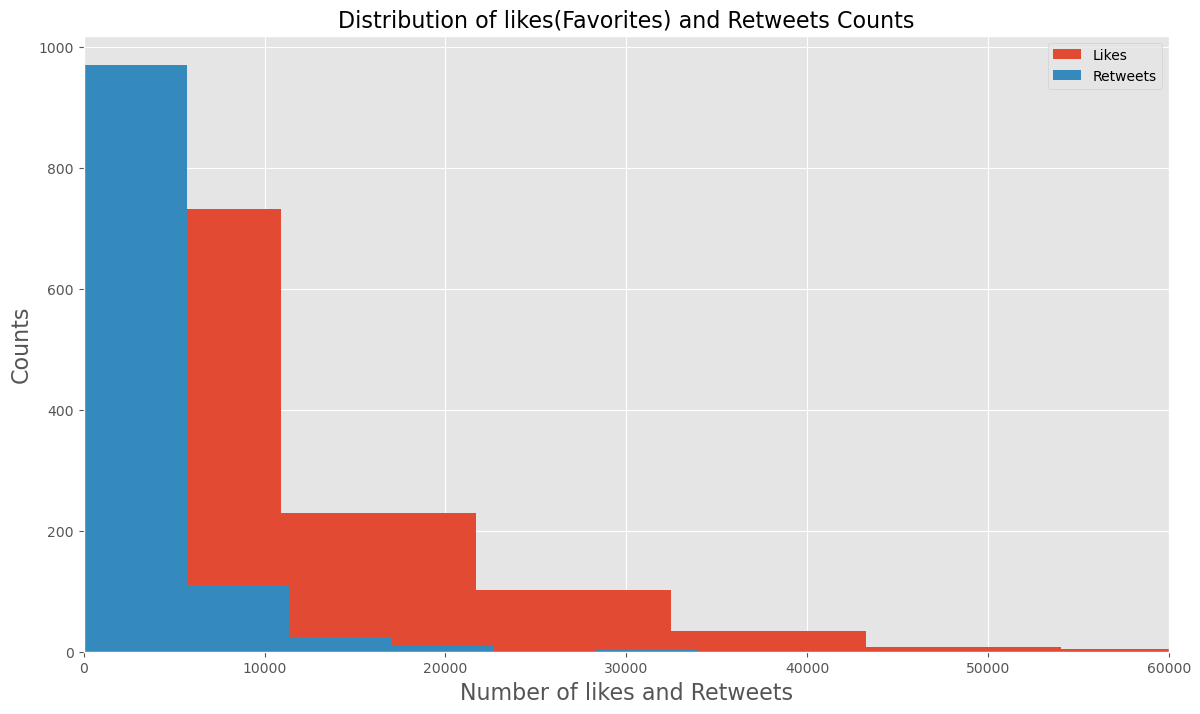

In [136]:
plt.figure(figsize=(14, 8))
plt.hist(twitter_archive_master.favorite_count, label = 'Likes')
plt.hist(twitter_archive_master.retweet_count, label = 'Retweets')
plt.title('Distribution of likes(Favorites) and Retweets Counts', fontsize = 16)
plt.xlabel('Number of likes and Retweets', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlim(-1, 60000)

plt.legend()

Text(0, 0.5, 'Likes')

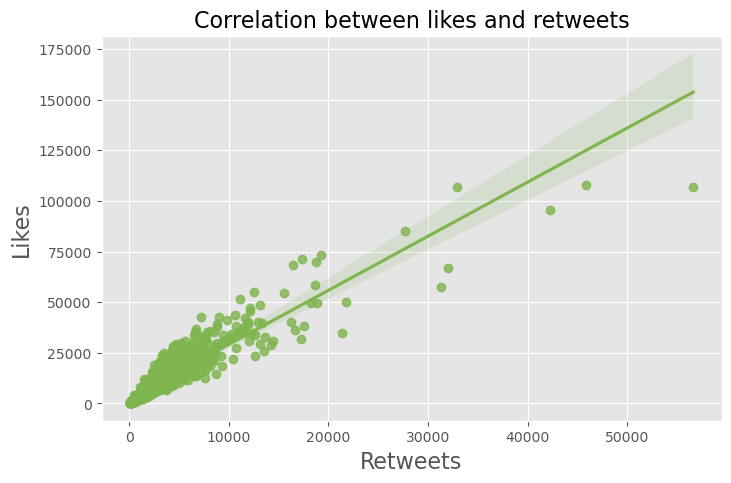

In [137]:
# using scatter plot to check for correlation
plt.figure(figsize=(8,5))
sns.regplot(data = twitter_archive_master, x='retweet_count', y='favorite_count', color = '#7eb54e')
plt.title('Correlation between likes and retweets', fontsize = 16)
plt.xlabel('Retweets', fontsize = 16)
plt.ylabel('Likes', fontsize = 16)

> The charts show a good correlation between likes and retweets. The number of retweets increases as the number of likes increases

### Which device has the highest number of tweets?

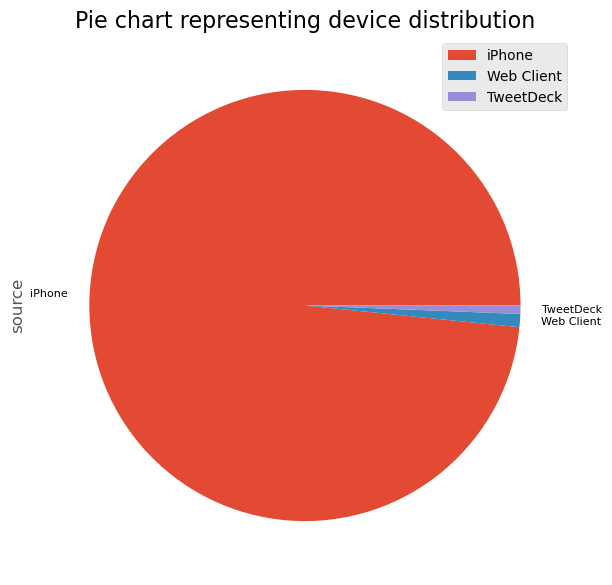

In [138]:
# pie chart representing device distribution
twitter_archive_master['source'].value_counts().plot.pie(labels = ['iPhone', 'Web Client', 'TweetDeck', 'Vine'], fontsize = 8, figsize = (7,7))
plt.title('Pie chart representing device distribution', fontsize = 16)
plt.legend()
plt.show()

> The pie chart indicates that majority of this twitter was generated by iphone users

### Which month did the user have the highest likes and retweets?

In [139]:
# number of likes and retweets per month
# get date data from the combined dataset
date_tweet = twitter_archive_master[['timestamp', 'retweet_count' ,'favorite_count']]
date_tweet['month'] = date_tweet.timestamp.dt.month_name()


C:\Users\alex2\AppData\Local\Temp\ipykernel_28132\1795169963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_tweet['month'] = date_tweet.timestamp.dt.month_name()


In [140]:
month_tweet = date_tweet.groupby('month').sum()
month_tweet

,retweet_count,favorite_count
month,,
April,213007,806418
August,156364,512043
December,458070,1225418
February,346652,1311460
January,385999,1183495
July,375417,1563768
June,337357,1318206
March,295149,1108758
May,261883,1005926


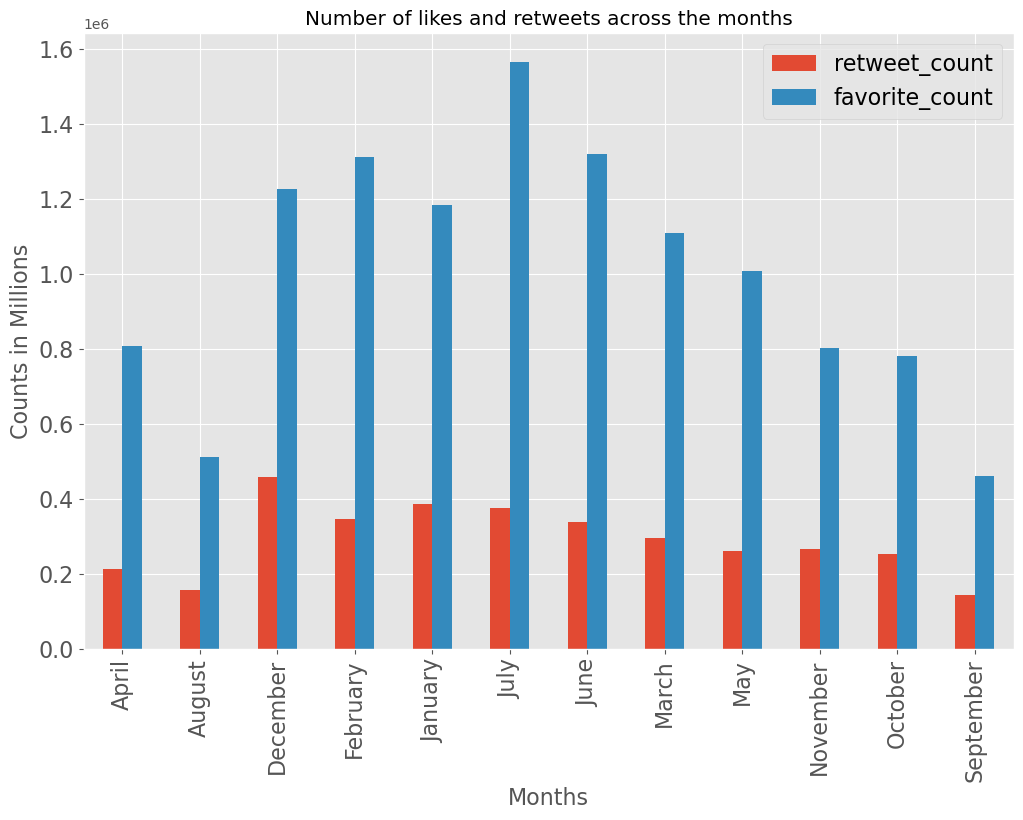

In [141]:
#Visualising the table
plt.style.use('ggplot')
likes_retweets = month_tweet[['retweet_count','favorite_count']].plot(kind = 'bar', title = 'Number of likes and retweets across the months' ,figsize=(12, 8), legend = True, fontsize = 16)
likes_retweets.set_xlabel("Months", fontsize = 16)
plt.ylabel('Counts in Millions', fontsize = 16)
plt.legend(prop={'size':16})


> The month of July had the highest number of likes as seen above. However, December and January appear to have more retweets than July. 

### Which dog breed is most popular?

In [142]:
images_copy = twitter_archive_master[['tweet_id' ,'prediction1' ,'1st_confidence', 'its_dog_1', 'favorite_count']]

In [143]:
# getting only true its_dog_1 value. that is, selecting only when it is a dog
images_copy = images_copy[images_copy['its_dog_1'] == True]

In [144]:
#Test
images_copy.sample(4)

,tweet_id,prediction1,1st_confidence,its_dog_1,favorite_count
436,778748913645780993,Staffordshire_bullterrier,0.351434,True,7717
197,832369877331693569,kelpie,0.504690,True,18792
2,891815181378084864,Chihuahua,0.716012,True,25461
1111,667119796878725120,Pembroke,0.741563,True,346


In [145]:
#top 20 dog breeds
top_breeds = images_copy.groupby('prediction1').sum().reset_index()
top_breeds = top_breeds[['prediction1', 'favorite_count']]
top_breeds = top_breeds.sort_values('favorite_count', ascending = False)[:20]
top_breeds

,prediction1,favorite_count
81,golden_retriever,1214805
44,Pembroke,744376
32,Labrador_retriever,706936
15,Chihuahua,524573
21,French_bulldog,433549
74,chow,282174
75,cocker_spaniel,257860
93,pug,256939
50,Samoyed,252088
100,toy_poodle,230601


Text(0.5, 1.0, "Bar chart of dog's breeds with highest number of likes")

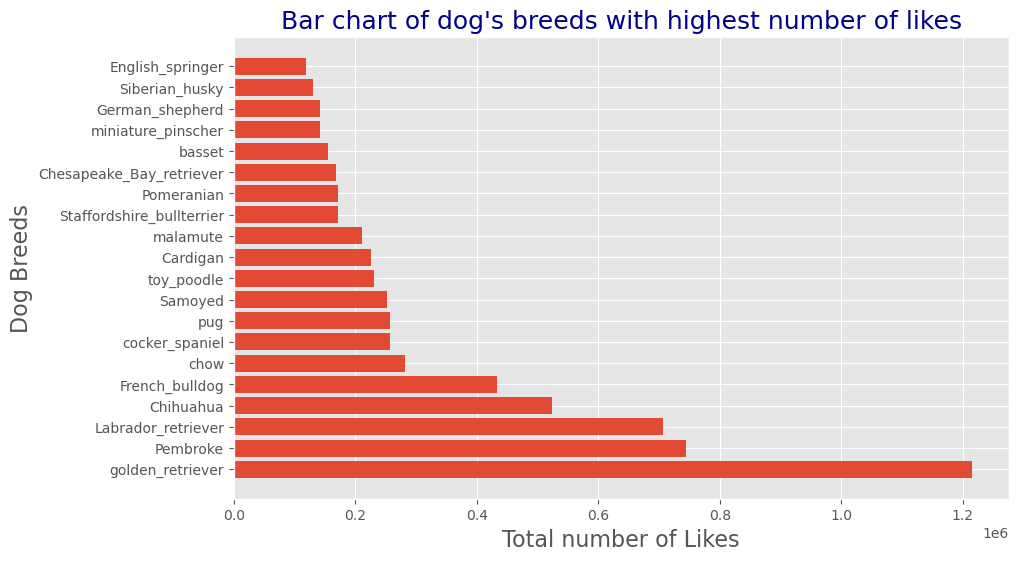

In [146]:
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
plt.barh(top_breeds['prediction1'], top_breeds.favorite_count) 
plt.yticks(top_breeds['prediction1'], top_breeds['prediction1'])
plt.ylabel('Dog Breeds', fontsize = 16)
plt.xlabel('Total number of Likes',fontsize = 16)
plt.title('Bar chart of dog\'s breeds with highest number of likes', color = 'darkblue', fontsize=18)
